In [1]:
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
full = pd.read_csv("../data/worldometers.csv")
full.country.unique()

array(['us', 'sweden', 'italy', 'south-korea', 'uk'], dtype=object)

In [3]:
full.datetime = pd.to_datetime(full.datetime)

In [4]:
df = full[full.country.isin(["us", "sweden"])]
deaths = df[df["var"] == "deaths"].sort_values(by="datetime")

In [5]:
elderly = {
    "us": 0.1563,
    "sweden": 0.2037,
}

pops = {
    "sweden": 10040995,
    "us": 326625791,
}

Warning: the US deaths increase after 2020-07-01. States are increasing at different times: the peak for New York deaths happened around April 13th. The peak for DC deaths happeend around May 3rd. On Aug. 2, CA and TX are still rising, and didn't have a peak around NY's.

Good summary site: https://www.us-covid-tracker.com/?time=all&field=newDeaths&consistentY=0&log=0

In [6]:
deaths = deaths[deaths.datetime <= datetime(2020, 7, 1)]

In [7]:
us = deaths[deaths.country == "us"].copy()
sweden = deaths[deaths.country == "sweden"].copy()

In [8]:
us["new_deaths"] = us["cases"].rolling(window=7).mean()
sweden["new_deaths"] = sweden["cases"].rolling(window=7).mean()

# Per 1 million population
us["new_deaths"] *= 1e6
sweden["new_deaths"] *= 1e6

us["new_deaths"] /= pops["us"]
sweden["new_deaths"] /= pops["sweden"]

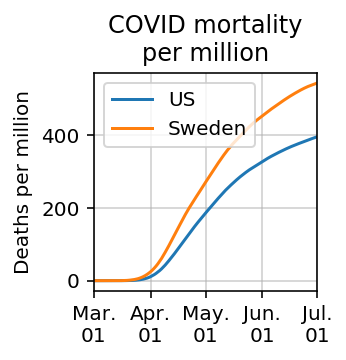

In [9]:

w = 2
fig, ax = plt.subplots(figsize=(w, w))

ax.plot(us.datetime, us.new_deaths, label="US")
ax.plot(sweden.datetime, sweden.new_deaths, label="Sweden")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b.\n%d'))
from datetime import datetime
month_starts = [datetime(2020, i, 1) for i in range(1, 12 + 1)]
ax.xaxis.set_major_locator(plt.FixedLocator([mdates.date2num(m) for m in month_starts]))
ax.set_xlim(datetime(2020, 3, 1), datetime(2020, 7, 1))
ax.legend(loc="best")
ax.grid(alpha=0.6)
ax.set_title("COVID mortality\nper million")
ax.set_ylabel("Deaths per million")

fig.savefig("imgs/sweden-us-pop.png", dpi=300, bbox_inches="tight")

In [11]:
!pwd

/Users/scott/Developer/stsievert/stsievert.gitlab.io/assets/2020-covid-19/comparisons


In [10]:
!ls imgs

hosp-risk.png         mn-death-rate.png     sweden-us-elderly.png
infection-rate.png    mn-hosp-rate.png      sweden-us-pop.png


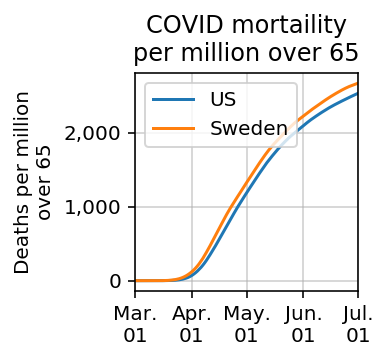

In [10]:
us["new_deaths"] /= elderly["us"]
sweden["new_deaths"] /= elderly["sweden"]

w = 2
fig, ax = plt.subplots(figsize=(w, w))

ax.plot(us.datetime, us.new_deaths, label="US")
ax.plot(sweden.datetime, sweden.new_deaths, label="Sweden")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b.\n%d'))
from datetime import datetime
month_starts = [datetime(2020, i, 1) for i in range(1, 12 + 1)]
ax.xaxis.set_major_locator(plt.FixedLocator([mdates.date2num(m) for m in month_starts]))
ax.set_xlim(datetime(2020, 3, 1), datetime(2020, 7, 1))
ax.legend(loc="best")
ax.grid(alpha=0.6)
ax.set_title("COVID mortaility\nper million over 65")
ax.set_ylabel("Deaths per million\nover 65")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:,}".format(int(x))))


fig.savefig("imgs/sweden-us-elderly.png", dpi=300, bbox_inches="tight")